In [2]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'D:\data\rape.csv')
df

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [4]:
df.shape

(1050, 11)

In [5]:
df.columns

Index(['Area_Name', 'Year', 'Subgroup', 'Rape_Cases_Reported',
       'Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_of_Rape_Total',
       'Victims_Upto_10_Yrs'],
      dtype='object')

In [6]:
df.dtypes

Area_Name                    object
Year                          int64
Subgroup                     object
Rape_Cases_Reported           int64
Victims_Above_50_Yrs          int64
Victims_Between_10-14_Yrs     int64
Victims_Between_14-18_Yrs     int64
Victims_Between_18-30_Yrs     int64
Victims_Between_30-50_Yrs     int64
Victims_of_Rape_Total         int64
Victims_Upto_10_Yrs           int64
dtype: object

In [7]:
df.isnull().head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

In [9]:
df[['Area_Name','Year','Victims_of_Rape_Total']].head()

,Area_Name,Year,Victims_of_Rape_Total
0,Andaman & Nicobar Islands,2001,3
1,Andaman & Nicobar Islands,2001,1
2,Andaman & Nicobar Islands,2001,2
3,Andaman & Nicobar Islands,2002,2
4,Andaman & Nicobar Islands,2002,0


In [10]:
b=df.groupby(['Area_Name','Year'])['Victims_of_Rape_Total'].sum().reset_index().head()
b

,Area_Name,Year,Victims_of_Rape_Total
0,Andaman & Nicobar Islands,2001,6
1,Andaman & Nicobar Islands,2002,4
2,Andaman & Nicobar Islands,2003,4
3,Andaman & Nicobar Islands,2004,20
4,Andaman & Nicobar Islands,2005,8


In [11]:
s=df.groupby(['Area_Name'])['Victims_of_Rape_Total'].sum().reset_index()
s.head()

,Area_Name,Victims_of_Rape_Total
0,Andaman & Nicobar Islands,168
1,Andhra Pradesh,21392
2,Arunachal Pradesh,824
3,Assam,25524
4,Bihar,22526


In [12]:
top=s.sort_values(by='Victims_of_Rape_Total', ascending=False).head(10)                #Top 10 States in Rape cases
top

,Area_Name,Victims_of_Rape_Total
19,Madhya Pradesh,58514
34,West Bengal,32756
32,Uttar Pradesh,30106
20,Maharashtra,29010
3,Assam,25524
28,Rajasthan,23908
4,Bihar,22526
1,Andhra Pradesh,21392
6,Chhattisgarh,19502
25,Odisha,17720


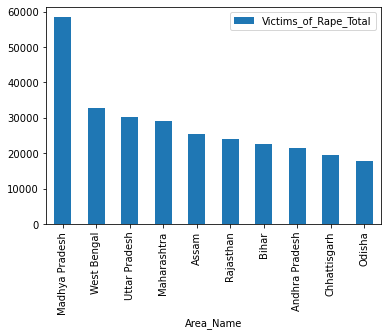

In [13]:
top.plot('Area_Name','Victims_of_Rape_Total',kind='bar')  

In [14]:
bottom=s.sort_values(by='Victims_of_Rape_Total', ascending=True).head(10)      # Bottom 10 States in Rape cases
bottom

,Area_Name,Victims_of_Rape_Total
18,Lakshadweep,14
8,Daman & Diu,28
7,Dadra & Nagar Haveli,98
26,Puducherry,114
0,Andaman & Nicobar Islands,168
29,Sikkim,298
24,Nagaland,352
5,Chandigarh,456
10,Goa,540
21,Manipur,546


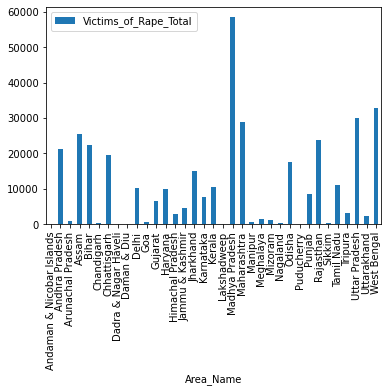

In [15]:
s.plot('Area_Name','Victims_of_Rape_Total',kind='bar')            # Madhya Pradesh has highest rape cases i.e 58514
                                                                  # Lakshadweep has lowest rape cases i.e 14

In [16]:
y=df.groupby(['Year'])['Victims_of_Rape_Total'].sum().reset_index()
y

,Year,Victims_of_Rape_Total
0,2001,32156
1,2002,32756
2,2003,31712
3,2004,36478
4,2005,36752
5,2006,38730
6,2007,41542
7,2008,42970
8,2009,42826
9,2010,44386


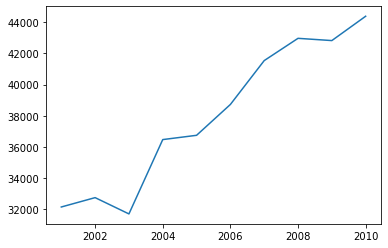

In [17]:
plt.plot(y.Year,y.Victims_of_Rape_Total)                           # Increase in rape cases from 2001 to 2010

In [18]:
a=df.groupby(['Area_Name'])['Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs','Victims_of_Rape_Total'].sum().reset_index()

In [19]:
a.head()

,Area_Name,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_Upto_10_Yrs,Victims_of_Rape_Total
0,Andaman & Nicobar Islands,0,16,88,42,8,14,168
1,Andhra Pradesh,198,2510,4022,11262,2540,860,21392
2,Arunachal Pradesh,0,96,20,632,38,38,824
3,Assam,190,306,818,17014,7104,92,25524
4,Bihar,78,204,1000,16988,4194,62,22526


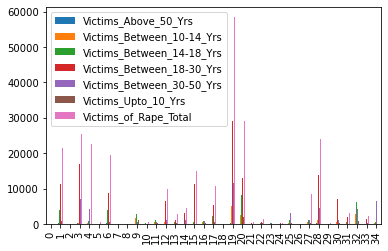

In [20]:
a.plot(kind='bar')

In [21]:
top=a.sort_values(by='Victims_of_Rape_Total', ascending=False).head(10)  
top

,Area_Name,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_Upto_10_Yrs,Victims_of_Rape_Total
19,Madhya Pradesh,362,4998,11108,29064,11566,1416,58514
34,West Bengal,20,312,546,25172,6580,126,32756
32,Uttar Pradesh,24,2848,6184,16152,4172,726,30106
20,Maharashtra,126,2610,8304,13120,2970,1880,29010
3,Assam,190,306,818,17014,7104,92,25524
28,Rajasthan,210,1100,3750,13732,4660,456,23908
4,Bihar,78,204,1000,16988,4194,62,22526
1,Andhra Pradesh,198,2510,4022,11262,2540,860,21392
6,Chhattisgarh,226,2414,3986,8678,3608,590,19502
25,Odisha,60,396,1070,12844,3074,276,17720


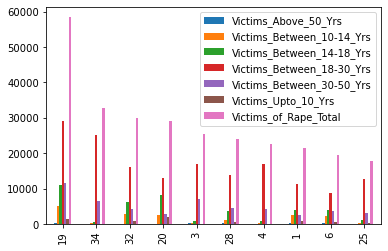

In [22]:
top.plot(kind='bar')

In [23]:
mp=top.head(1)

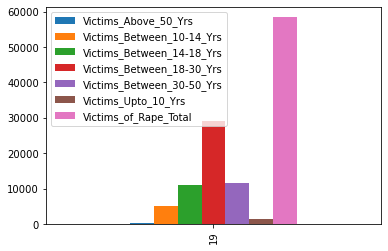

In [24]:
mp.plot(kind='bar')

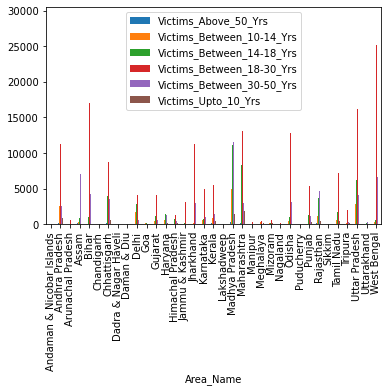

In [25]:
a.plot(x='Area_Name',y=['Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
           'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs'],kind='bar')

In [26]:
a.corr()

,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_Upto_10_Yrs,Victims_of_Rape_Total
Victims_Above_50_Yrs,1.000000,0.772461,0.760040,0.687836,0.790971,0.616276,0.789108
Victims_Between_10-14_Yrs,0.772461,1.000000,0.964617,0.640798,0.669028,0.872598,0.803052
Victims_Between_14-18_Yrs,0.760040,0.964617,1.000000,0.672199,0.687673,0.908131,0.829711
Victims_Between_18-30_Yrs,0.687836,0.640798,0.672199,1.000000,0.955570,0.507193,0.968504
Victims_Between_30-50_Yrs,0.790971,0.669028,0.687673,0.955570,1.000000,0.469294,0.956257
Victims_Upto_10_Yrs,0.616276,0.872598,0.908131,0.507193,0.469294,1.000000,0.668325
Victims_of_Rape_Total,0.789108,0.803052,0.829711,0.968504,0.956257,0.668325,1.000000


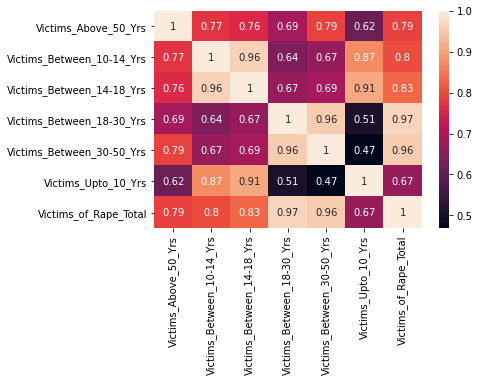

In [27]:
sns.heatmap(a.corr(),annot=True)

In [28]:
y=df.groupby(['Year'])['Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs','Victims_of_Rape_Total'].sum().reset_index()

In [29]:
y.head()

,Year,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_Upto_10_Yrs,Victims_of_Rape_Total
0,2001,136,2880,7822,15762,4496,1060,32156
1,2002,132,1708,2650,21460,5984,822,32756
2,2003,120,1862,3584,19746,5622,778,31712
3,2004,162,2180,4008,22686,6378,1064,36478
4,2005,222,2348,4688,21618,6762,1114,36752


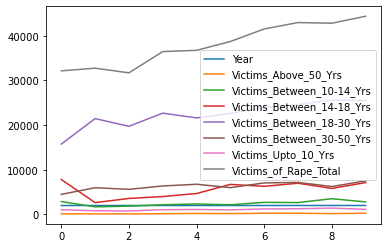

In [30]:
y.plot()                                         # Age 18-30 yrs is most vulnerable to Rape crime

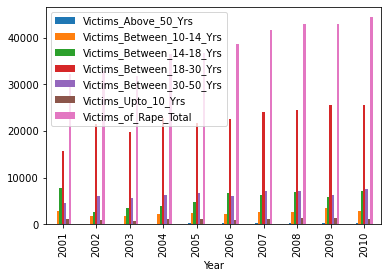

In [31]:
y.plot(x='Year',y=['Victims_Above_50_Yrs','Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs','Victims_of_Rape_Total'],kind='bar')

In [32]:
top=y.sort_values(by='Victims_of_Rape_Total', ascending=False)
top

,Year,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_Upto_10_Yrs,Victims_of_Rape_Total
9,2010,272,2808,7140,25498,7526,1142,44386
7,2008,272,2662,6992,24598,7168,1278,42970
8,2009,190,3520,5824,25624,6248,1420,42826
6,2007,266,2710,6304,23968,7060,1234,41542
5,2006,188,2162,6728,22624,6004,1024,38730
4,2005,222,2348,4688,21618,6762,1114,36752
3,2004,162,2180,4008,22686,6378,1064,36478
1,2002,132,1708,2650,21460,5984,822,32756
0,2001,136,2880,7822,15762,4496,1060,32156
2,2003,120,1862,3584,19746,5622,778,31712


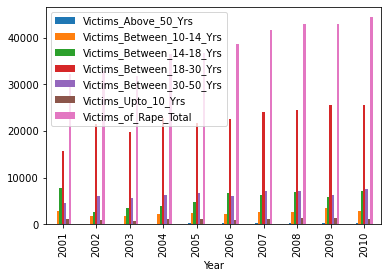

In [33]:
y.plot(x='Year',y=['Victims_Above_50_Yrs','Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs','Victims_of_Rape_Total'],kind='bar')

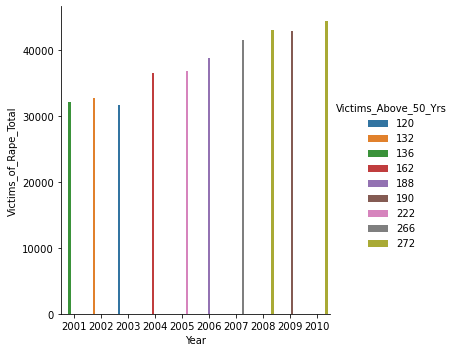

In [34]:
sns.catplot(x='Year',y='Victims_of_Rape_Total',hue='Victims_Above_50_Yrs',data=y,kind='bar')

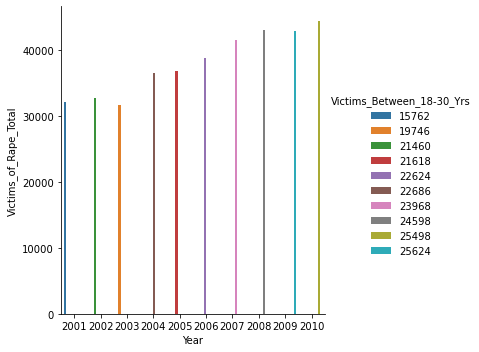

In [35]:
sns.catplot(x='Year',y='Victims_of_Rape_Total',hue='Victims_Between_18-30_Yrs',data=y,kind='bar')

Conclusion:From the above analysis of the Rape Crime dataset we get the following observations:
           1) Madhya Pradesh state records the highest no of rape crimes in the country.
           2) Lakshawdeep union teritory records the leat no of rape crimes in the country
           3)The data shows rape crime committed in the country is increasing in the country with each year
           4)The data shows rape crime is committed on each age group of women but age group 18-30 is more vulnerable as more                no of rape crime committed in this age group